# **Exploratory Data Analysis(EDA)&Data Preprocessing&Machine Learning**

# İncluding Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")

# Loading Datasets

In [2]:
df = pd.read_csv("tablet.csv")
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


# INFORMATION ABOUT DATA

In [3]:
df.tail()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


In [4]:
df.shape # Kaç satır kaç sütun

(2000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [6]:
df["FiyatAraligi"].value_counts() # Hedef değişkenimizin ne kadar dengeli dağıldığına bakalım

Normal      500
Pahalı      500
Ucuz        500
Çok Ucuz    500
Name: FiyatAraligi, dtype: int64

<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

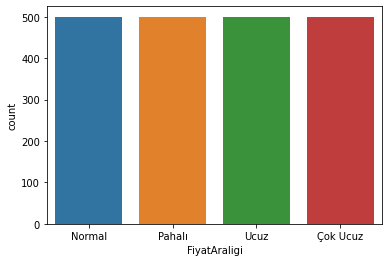

In [7]:
sns.countplot(x="FiyatAraligi", data=df) # Dengeli dağılım

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [8]:
corr = df.corr()
corr # En güçlü ilişki "ArkaKameraMP değişkeni ile "ÖnkameraMP" değişkeni arasındadır.

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


<AxesSubplot:>

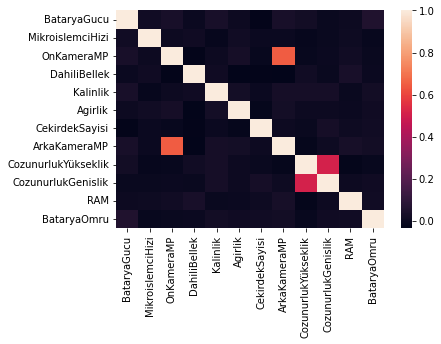

In [9]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
df.describe().T # Sayısal değişkenler için temel istatistiki değerlere bakıyoruz

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


Veri çerçevemizde "wifi", "bataryaömrü" ve "renk" değişkenlerimizin ne kadar dengeli dağıldığını sorgulayalım

In [11]:
df["WiFi"].value_counts()

Var    1014
Yok     986
Name: WiFi, dtype: int64

In [12]:
df["Renk"].value_counts()

Beyaz         194
Siyah         183
Mor           175
Turuncu       175
Pembe         168
Kırmızı       168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: Renk, dtype: int64

In [13]:
df["Renk"].nunique()

12

In [14]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

# DATA VİSUALİZATİON

<AxesSubplot:xlabel='Dokunmatik', ylabel='count'>

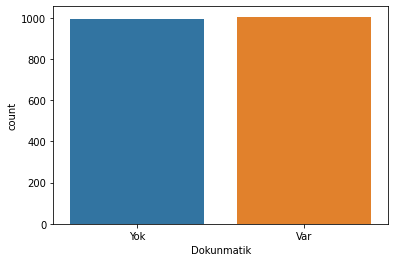

In [15]:
sns.countplot(df["Dokunmatik"])

<AxesSubplot:xlabel='Agirlik'>

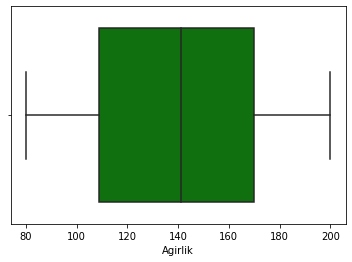

In [16]:
sns.boxplot(df["Agirlik"], color="green")

<AxesSubplot:ylabel='RAM'>

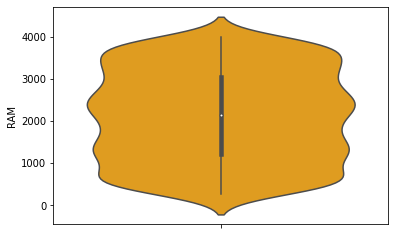

In [17]:
sns.violinplot(y="RAM", color="orange", data=df)

RAM değişkenimizin değeri yoğun olarak 2000 değerinde dağılmış. Yani normal bir dağılım olduğunu söyleyebiliriz.

<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

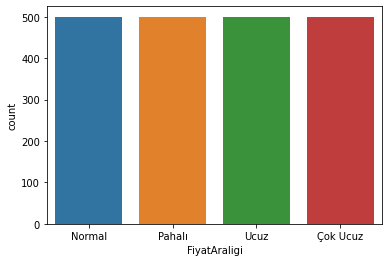

In [18]:
sns.countplot(x="FiyatAraligi", data=df)

<AxesSubplot:xlabel='BataryaOmru', ylabel='count'>

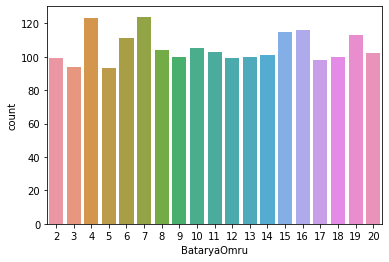

In [19]:
sns.countplot(x="BataryaOmru", data=df)

<AxesSubplot:xlabel='Agirlik', ylabel='count'>

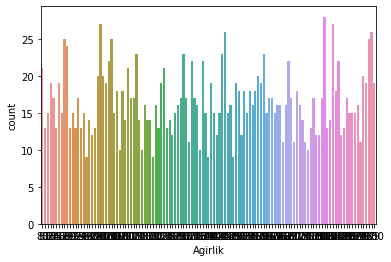

In [20]:
sns.countplot(x="Agirlik", data=df)

<AxesSubplot:xlabel='BataryaGucu', ylabel='Density'>

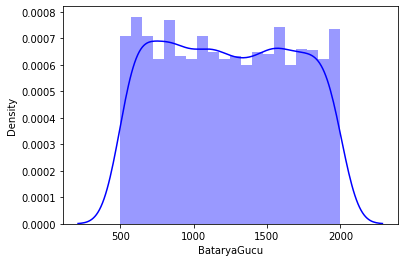

In [21]:
sns.distplot(df["BataryaGucu"], bins=20, color="blue")

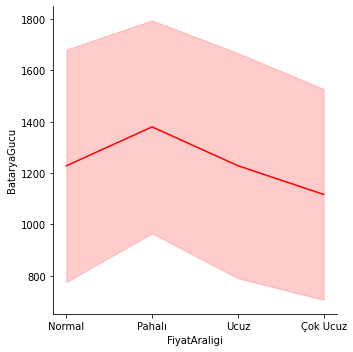

In [22]:
sns.relplot(x="FiyatAraligi", y="BataryaGucu", kind="line", ci="sd", color="red", data=df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='RAM'>

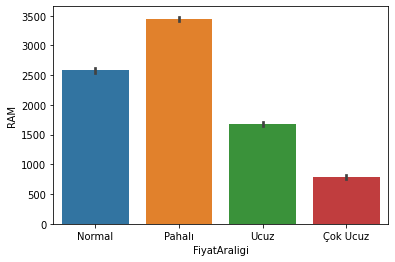

In [23]:
sns.barplot(x="FiyatAraligi", y="RAM", data=df)

<AxesSubplot:xlabel='ArkaKameraMP', ylabel='DahiliBellek'>

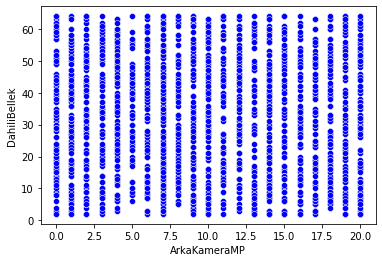

In [24]:
sns.scatterplot(x="ArkaKameraMP", y="DahiliBellek", data=df, color="blue")

Aralarında negatif bir ilişki olduğunu söyleyebiliriz.

<AxesSubplot:xlabel='RAM', ylabel='BataryaGucu'>

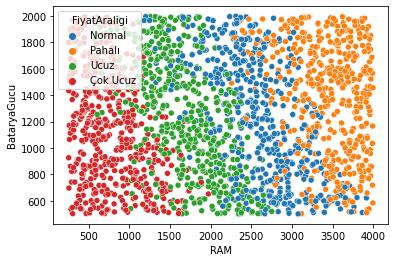

In [25]:
sns.scatterplot(x="RAM", y="BataryaGucu", hue="FiyatAraligi", data=df)

Doğru bir orantı söz konusu

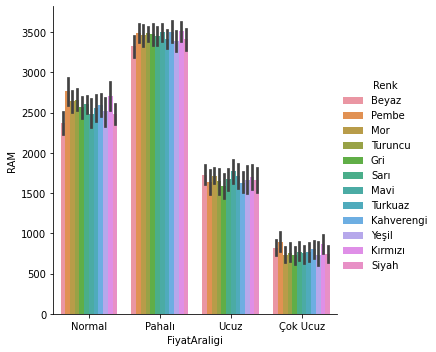

In [26]:
sns.catplot("FiyatAraligi", "RAM", "Renk", data=df, kind="bar")

•RAM ve BataryaGucu değişkenleri arasında doğru orantı olduğunu söylemiştik. Şimdi ise Renk değişkeni ile FiyatAraligi değişkeni arasındaki ilişkiyi inceledik.
• Grafikten de görüldüğü üzere Renk ve FiyatAraligi değişkenleri arasında bir ilişkiden söz etmek mümkün değil.

# DATA PREPROCESSİNG

Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğuna bakalım

In [27]:
df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [28]:
df.isnull().sum().sum()

17

In [29]:
df[df["RAM"].isnull()] # RAM özniteliğinde 12 adet eksik veri var. Şimdi bunları inceleyelim

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


RAM özniteliği sadece hedef özniteliğimiz olan FiyatAraligi özniteliğinin pahalı olduğu gözlemlerde eksik değere sahiptir

Şimdi ise bu değerleri FiyatAraligi özniteliğinin pahalı olduğu gözlemlerdeki RAM özniteliğinin ortalama değerini bir değişkene atayacağız ve RAM özniteliğinin eksik değerlerini meanRam değişkeninin değeriyle dolduracağız.

In [30]:
meanRam = df[df["FiyatAraligi"]=='Pahalı'].mean()['RAM']
df['RAM'].fillna(meanRam, inplace=True)

Eksik değere sahip olan OnKameraMP özniteliğinin eksik değerlerini ayrıntılı bir biçimde inceleyelim

In [31]:
df[df['OnKameraMP'].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


OnKameraMP özniteliği sadece hedef özniteliğimiz olan FiyatAraligi özniteliğinin çok ucuz olduğu gözlemlerde eksik değere sahiptir

Bu değerleri FiyatAraligi özniteliğinin çok ucuz olduğu gözlemlerdeki OnKameraMP özniteliğinin ortalama değerini bir değişkene atayacağız ve OnKameraMP özniteliğinin eksik değerlerini meanOnKamera değişkeninin değeriyle dolduracağız.

In [32]:
meanOnKamera = df[df["FiyatAraligi"]=='Çok Ucuz'].mean()['OnKameraMP']
df["OnKameraMP"].fillna(meanOnKamera, inplace=True)

In [33]:
df.isnull().sum().sum() # Artık eksik veri yok

0

In [34]:
df.drop("Renk", axis=1, inplace=True)

Kategorik değişkenlerin sıralanabilir(ordered) veya sıralanamaz(nominal) olma durumlarına göre uygun sayısallaştırma işlemleri yapalım

In [35]:
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()

LabelEncoder kullanmamızın sebebi bu değişkenlerde sıralama işleminin uygulanamamasıdır.

In [36]:
df["WiFi"] = LabelEncoder.fit_transform(df["WiFi"])
df["3G"] = LabelEncoder.fit_transform(df["3G"])
df["Dokunmatik"] = LabelEncoder.fit_transform(df["Dokunmatik"])
df["Bluetooth"] = LabelEncoder.fit_transform(df["Bluetooth"])
df["CiftHat"] = LabelEncoder.fit_transform(df["CiftHat"])
df["4G"] = LabelEncoder.fit_transform(df["4G"])
df["FiyatAraligi"] = LabelEncoder.fit_transform(df["FiyatAraligi"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   int64  
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   int64  
 4   OnKameraMP           2000 non-null   float64
 5   4G                   2000 non-null   int64  
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  2000 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   i

In [38]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,1
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,2
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,1
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,0


Tüm kategorik değişkenlerimiz sayısallaştırılmıştır ve artık makine öğrenmesi modellerine uygun hale getirilmiştir

In [39]:
df.to_csv("cleaning_data.csv", index=False)